## Linear models

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

In [12]:
df = pd.read_csv('https://github.com/Explore-AI/Public-Data/blob/master/exports%20ZAR-USD-data.csv?raw=true', index_col=0)

In [14]:
df.head(10)

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45
2008M06,7.92,60159.93
2008M07,7.63,61268.16
2008M08,7.66,60390.94
2008M09,8.06,61067.34
2008M10,9.74,65652.57


In [15]:
df.shape

(120, 2)

In [17]:
df.columns = ['Y','X']

In [18]:
df.head()

,Y,X
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


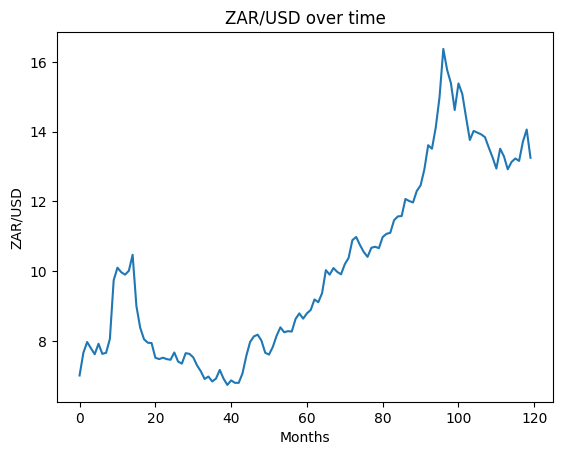

In [19]:
# Plotting the ZAR/USD exchange rate over time
plt.plot(np.arange(len(df.Y)), df.Y) # Create a line plot for the ZAR/USD values
plt.title("ZAR/USD over time") # Title of the plot
plt.xlabel("Months") # Label for the x-axis 
plt.ylabel("ZAR/USD") # Label for the y-axis
plt.show() # Display the plot

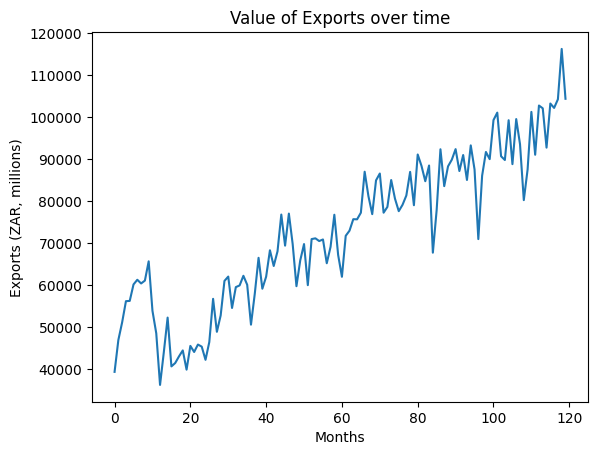

In [20]:
# Plotting the value of exports over time
plt.plot(np.arange(len(df.X)), df.X) # Create a line plot for the export values
plt.title("Value of Exports over time") # Title of the plot
plt.xlabel("Months") # Label for the x-axis
plt.ylabel("Exports (ZAR, millions)") # Label for the y-axis
plt.show()

#### Let's get started with regression

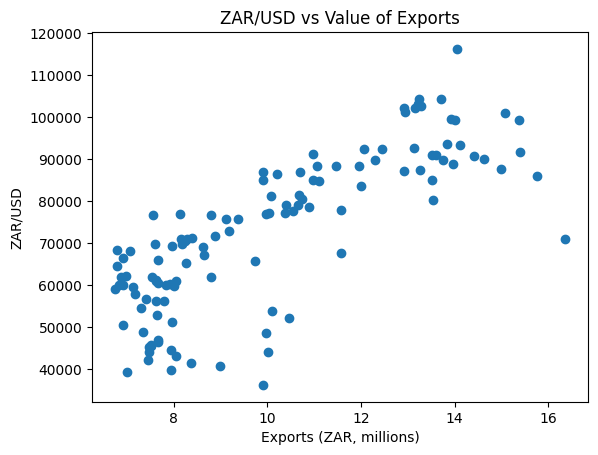

In [22]:
plt.scatter(df.Y, df.X) # Create a scatter plot for the ZAR/USD values and export values
plt.title("ZAR/USD vs Value of Exports") # Title of the plot
plt.ylabel("ZAR/USD") # Label for the x-axis
plt.xlabel("Exports (ZAR, millions)") # Label for the y-axis
plt.show()

### Finding the best fit line

𝑦̂𝑖=𝑚𝑥𝑖+𝑐

In [23]:


def gen_y(x_list,m,c):
  y_gen = []
  for x_i in x_list:
    y_gen.append(m*x_i + c)
  return y_gen

In [33]:
def scatter_plot(df,m,c):
  plt.scatter(df.X, df.Y) # Create a scatter plot for the ZAR/USD values and export values
  plt.plot(df.X, gen_y(df.X,m,c), color='red') # Create a line plot for the regression line
  plt.title("ZAR/USD vs Value of Exports") # Title of the plot
  plt.ylabel("ZAR/USD") # Label for the y-axis
  plt.xlabel("Exports (ZAR, millions)") # Label for the x-axis
  plt.show()

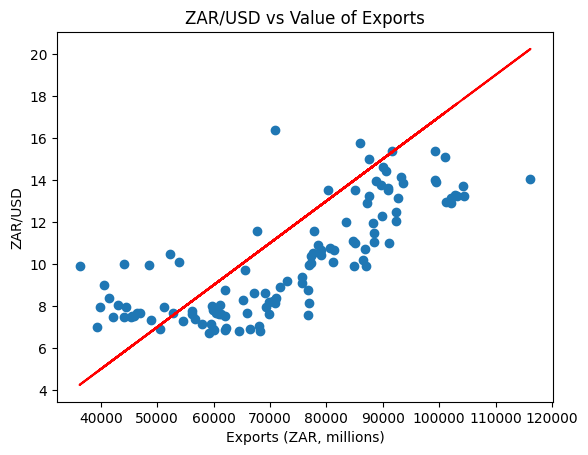

In [32]:
scatter_plot(df,0.0002,-3)

Let's check the calculated fit of the line by measuring how far the true y-values of each point are from their corresponding y-value on the line.



In [36]:
error = np.array(df.Y - gen_y(df.X,0.0002,-3))
np.round(error,2)

array([ 2.14,  1.27,  0.74, -0.44, -0.63, -1.11, -1.62, -1.42, -1.15,
       -0.39,  2.32,  3.26,  5.65,  4.2 ,  3.02,  3.87,  3.09,  2.44,
        2.06,  2.96,  1.41,  1.66,  1.35,  1.41,  2.02,  1.38, -0.94,
        0.57,  0.09, -1.57, -1.88, -0.61, -1.77, -2.07, -2.46, -2.18,
       -0.2 , -1.42, -3.38, -2.09, -2.53, -3.86, -3.11, -3.54, -4.79,
       -2.91, -4.27, -2.78, -0.94, -2.52, -3.34, -1.17, -3.04, -2.84,
       -2.85, -2.89, -1.77, -2.19, -3.56, -1.8 , -0.61, -2.46, -2.4 ,
       -3.03, -2.76, -2.41, -4.49, -3.14, -2.4 , -4.07, -4.11, -2.06,
       -1.83, -3.02, -2.36, -1.97, -2.41, -2.59, -3.69, -2.14, -4.23,
       -3.6 , -2.84, -3.23,  1.03, -0.99, -3.39, -1.7 , -2.68, -2.67,
       -3.01, -1.51, -1.58, -0.49, -1.53,  0.49,  5.18,  1.57,  0.06,
       -0.37, -1.47, -2.13, -0.72, -1.19, -2.83, -0.78, -2.98, -1.86,
        0.5 , -1.24, -4.3 , -1.69, -4.25, -4.49, -2.41, -4.41, -4.27,
       -4.13, -6.18, -4.61])

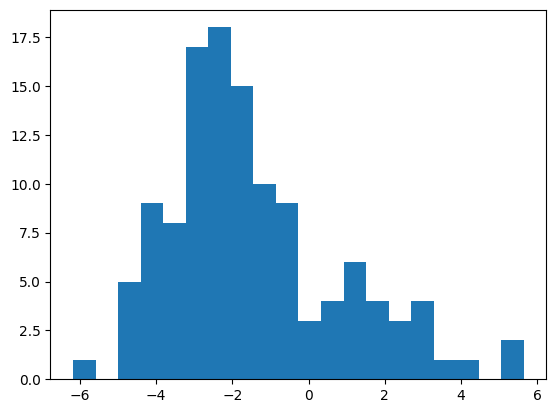

In [38]:
plt.hist(error, bins=20)
plt.show() # Create a histogram for the residuals

In [40]:
print("Residual sum of squares:",(error**2).sum())

Residual sum of squares: 867.1710481532764


#### Least squares regression

In [41]:
df.head()

,Y,X
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


In [46]:
X = df.X.values
Y = df.Y.values
x_bar = X.mean()
y_bar = Y.mean()

In [48]:
# Calculate the slope of the regression line
m = sum((X - x_bar)*(Y - y_bar))/sum((X - x_bar)**2)
m

0.000113507257658843

In [49]:
# Calculate the y-intercept of the regression line
c = y_bar - m*x_bar
c

1.8448114670426463

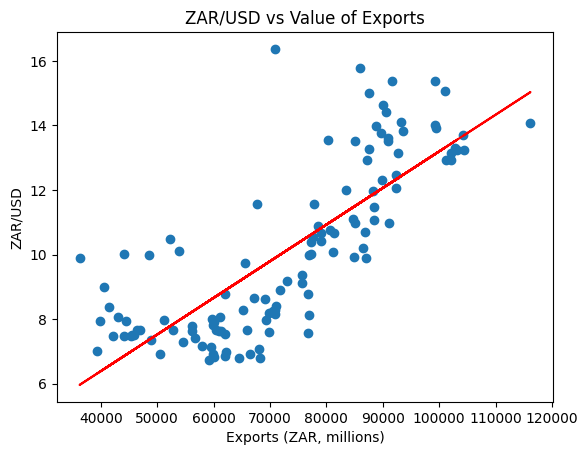

In [51]:
scatter_plot(df,m,c)


In [56]:
error = np.array(df.Y - gen_y(df.X,m,c))
np.round(error,2)

array([ 0.7 ,  0.49,  0.32, -0.43, -0.61, -0.75, -1.17, -1.04, -0.72,
        0.44,  2.14,  2.62,  3.94,  3.16,  2.69,  2.54,  1.83,  1.32,
        1.06,  1.57,  0.51,  0.63,  0.47,  0.49,  0.82,  0.55, -0.87,
       -0.04, -0.19, -1.14, -1.36, -0.74, -1.47, -1.74, -1.93, -1.82,
       -0.67, -1.25, -2.47, -1.82, -2.01, -2.8 , -2.37, -2.5 , -2.99,
       -1.75, -2.46, -1.58, -0.62, -1.66, -2.15, -0.82, -1.75, -1.53,
       -1.59, -1.61, -0.98, -1.06, -1.77, -0.83, -0.09, -1.1 , -0.93,
       -1.32, -1.06, -0.58, -1.82, -0.96, -0.59, -1.57, -1.47, -0.23,
        0.12, -0.51, -0.24, -0.1 , -0.41, -0.4 , -1.01, -0.15, -1.2 ,
       -0.8 , -0.36, -0.42,  2.04,  0.9 , -0.25,  0.68,  0.11,  0.26,
        0.13,  1.19,  1.44,  2.02,  1.69,  3.21,  6.47,  4.16,  3.14,
        2.56,  2.27,  1.77,  2.27,  1.73,  0.91,  2.05,  0.78,  1.38,
        2.59,  1.49, -0.39,  1.33, -0.21, -0.51,  0.76, -0.33, -0.28,
        0.04, -0.97, -0.44])

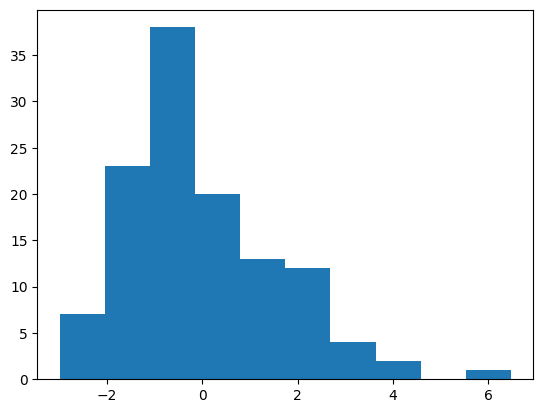

In [57]:
plt.hist(error)
plt.show()

In [58]:
# Calculate the residual sum of squares (RSS) by squaring the residuals and summing them up
print("Residual sum of squares:", (error ** 2).sum())

Residual sum of squares: 321.45716655257655


In [60]:
# Round off the sum of residuals to 11 decimal places to check for numerical stability or precision issues
np.round(error.sum(),11)

0.0

##### Linear regression in sci-kit learn

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lm = LinearRegression()

In [67]:
XX = df.X.values[:,np.newaxis]
lm.fit(XX,df.Y)

LinearRegression()

In [71]:
slop = lm.coef_[0]
intercept = lm.intercept_

In [72]:
# Print the slope and intercept
print("Slope:\t\t", slop)
print("Intercept:\t", intercept)

Slope:		 0.000113507257658843
Intercept:	 1.8448114670426463


In [73]:
gen_yy = lm.predict(XX)

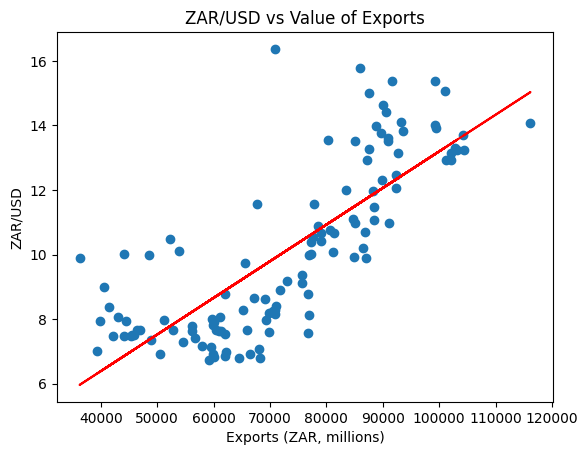

In [76]:
scatter_plot(df,slop,intercept )

### Assessing the model accuracy

In [78]:
# Calculate and print the residual sum of squares (RSS) for the fitted model
print("Residual sum of squares:", ((gen_yy - df.Y) ** 2).sum())

Residual sum of squares: 321.45716655257655


#### Sci-kit learn error metrics

In [79]:
from sklearn import metrics

In [81]:
# Calculate and print the mean squared error (MSE) between the observed and predicted Y values
print('MSE:', metrics.mean_squared_error(df.Y, gen_yy))

MSE: 2.678809721271471


In [82]:
# Calculate and print the RSS by multiplying the MSE by the number of observations
print("Residual sum of squares:", metrics.mean_squared_error(df.Y, gen_yy)*len(X))

Residual sum of squares: 321.45716655257655


In [84]:
# Calculate and print the R-squared value, a measure of how well the observed values are replicated by the model
print('R_squared:', metrics.r2_score(df.Y, gen_yy))

R_squared: 0.6158417476896207
